## 라이브러리 임포트_20221116
- 실습에 필요한 라이브러리를 임포트.

In [2]:
import numpy as np
import pandas as pd

#sklearn 모델의 동일한 결과 출력을 위해 선언합니다.
np.random.seed(5)

## 문제 정의
- 서울 지역(구)의 경도와 위도 정보를 사용하여, 임의로 입력된 지역(동)을 강동, 강서, 강남, 강북으로 분류해보는 예제.

## 데이터 수집
- 아래는 서울의 대표적인 구(district) 위치 데이터임.
- 구(district) 정보는 학습에 사용함.

### 컬럼 주석
- district : 행정구역(서초구, 송파구, 용산구 등, 서울의 단위 지역 분류)
- dong : 구(district)보다 작은 행정구역(개치동, 도곡동, 암사동 등, 서울의 소단위 분류)
- latitude : 위도
- longitude : 경도
- label : 한강 기준으로 동/서/남/북으로 구분한 지역 명칭

In [16]:
# 전처리 과정

district_dict_list = [
            {'district': 'Gangseo-gu', 'latitude': 37.551000, 'longitude': 126.849500, 'label':'Gangseo'},
            {'district': 'Yangcheon-gu', 'latitude': 37.52424, 'longitude': 126.855396, 'label':'Gangseo'},
            {'district': 'Guro-gu', 'latitude': 37.4954, 'longitude': 126.8874, 'label':'Gangseo'},
            {'district': 'Geumcheon-gu', 'latitude': 37.4519, 'longitude': 126.9020, 'label':'Gangseo'},
            {'district': 'Mapo-gu', 'latitude': 37.560229, 'longitude': 126.908728, 'label':'Gangseo'},
            
            {'district': 'Gwanak-gu', 'latitude': 37.487517, 'longitude': 126.915065, 'label':'Gangnam'},
            {'district': 'Dongjak-gu', 'latitude': 37.5124, 'longitude': 126.9393, 'label':'Gangnam'},
            {'district': 'Seocho-gu', 'latitude': 37.4837, 'longitude': 127.0324, 'label':'Gangnam'},
            {'district': 'Gangnam-gu', 'latitude': 37.5172, 'longitude': 127.0473, 'label':'Gangnam'},
            {'district': 'Songpa-gu', 'latitude': 37.503510, 'longitude': 127.117898, 'label':'Gangnam'},
   
            {'district': 'Yongsan-gu', 'latitude': 37.532561, 'longitude': 127.008605, 'label':'Gangbuk'},
            {'district': 'Jongro-gu', 'latitude': 37.5730, 'longitude': 126.9794, 'label':'Gangbuk'},
            {'district': 'Seongbuk-gu', 'latitude': 37.603979, 'longitude': 127.056344, 'label':'Gangbuk'},
            {'district': 'Nowon-gu', 'latitude': 37.6542, 'longitude': 127.0568, 'label':'Gangbuk'},
            {'district': 'Dobong-gu', 'latitude': 37.6688, 'longitude': 127.0471, 'label':'Gangbuk'},
     
            {'district': 'Seongdong-gu', 'latitude': 37.557340, 'longitude': 127.041667, 'label':'Gangdong'},
            {'district': 'Dongdaemun-gu', 'latitude': 37.575759, 'longitude': 127.025288, 'label':'Gangdong'},
            {'district': 'Gwangjin-gu', 'latitude': 37.557562, 'longitude': 127.083467, 'label':'Gangdong'},
            {'district': 'Gangdong-gu', 'latitude': 37.554194, 'longitude': 127.151405, 'label':'Gangdong'},
            {'district': 'Jungrang-gu', 'latitude': 37.593684, 'longitude': 127.090384, 'label':'Gangdong'}
         ]

train_df = pd.DataFrame(district_dict_list) # 테이블 형으로 제공해주는 것이 가장 먼저다.
train_df = train_df[['district','longitude','latitude','label']]
train_df

,district,longitude,latitude,label
0,Gangseo-gu,126.849500,37.551000,Gangseo
1,Yangcheon-gu,126.855396,37.524240,Gangseo
2,Guro-gu,126.887400,37.495400,Gangseo
3,Geumcheon-gu,126.902000,37.451900,Gangseo
4,Mapo-gu,126.908728,37.560229,Gangseo
5,Gwanak-gu,126.915065,37.487517,Gangnam
6,Dongjak-gu,126.939300,37.512400,Gangnam
7,Seocho-gu,127.032400,37.483700,Gangnam
8,Gangnam-gu,127.047300,37.517200,Gangnam
9,Songpa-gu,127.117898,37.503510,Gangnam


- 아래는 서울의 대표적인 동 위치 데이터.
- 동 정보는 테스트 시 사용하도록 함.

In [17]:
dong_dict_list = [
            # 강서구
            {'dong': 'Gaebong-dong', 'latitude': 37.489853, 'longitude': 126.854547, 'label':'Gangseo'},
            {'dong': 'Gochuk-dong', 'latitude': 37.501394, 'longitude': 126.859245, 'label':'Gangseo'},
            {'dong': 'Hwagok-dong', 'latitude': 37.537759, 'longitude': 126.847951, 'label':'Gangseo'},
            {'dong': 'Banghwa-dong', 'latitude': 37.575817, 'longitude': 126.815719, 'label':'Gangseo'},
            {'dong': 'Sangam-dong', 'latitude': 37.577039, 'longitude': 126.891620, 'label':'Gangseo'},
            # 강남구
            {'dong': 'Nonhyun-dong', 'latitude': 37.508838, 'longitude': 127.030720, 'label':'Gangnam'},
            {'dong': 'Daechi-dong', 'latitude': 37.501163, 'longitude': 127.057193, 'label':'Gangnam'},
            {'dong': 'Seocho-dong', 'latitude': 37.486401, 'longitude': 127.018281, 'label':'Gangnam'},
            {'dong': 'Bangbae-dong', 'latitude': 37.483279, 'longitude': 126.988194, 'label':'Gangnam'},
            {'dong': 'Dogok-dong', 'latitude': 37.492896, 'longitude': 127.043159, 'label':'Gangnam'},
            # 강북구
            {'dong': 'Pyoungchang-dong', 'latitude': 37.612129, 'longitude': 126.975724, 'label':'Gangbuk'},
            {'dong': 'Sungbuk-dong', 'latitude': 37.597916, 'longitude': 126.998067, 'label':'Gangbuk'},
            {'dong': 'Ssangmoon-dong', 'latitude': 37.648094, 'longitude': 127.030421, 'label':'Gangbuk'},
            {'dong': 'Ui-dong', 'latitude': 37.648446, 'longitude': 127.011396, 'label':'Gangbuk'},
            {'dong': 'Samcheong-dong', 'latitude': 37.591109, 'longitude': 126.980488, 'label':'Gangbuk'},
            # 강동구
            {'dong': 'Hwayang-dong', 'latitude': 37.544234, 'longitude': 127.071648, 'label':'Gangdong'},
            {'dong': 'Gui-dong', 'latitude': 37.543757, 'longitude': 127.086803, 'label':'Gangdong'},
            {'dong': 'Neung-dong', 'latitude': 37.553102, 'longitude': 127.080248, 'label':'Gangdong'},
            {'dong': 'Amsa-dong', 'latitude': 37.552370, 'longitude': 127.127124, 'label':'Gangdong'},
            {'dong': 'Chunho-dong', 'latitude': 37.547436, 'longitude': 127.137382, 'label':'Gangdong'}
         ]

test_df = pd.DataFrame(dong_dict_list) # 테이블 형으로 제공해주는 것이 가장 먼저다.
test_df = test_df[['dong','longitude','latitude','label']]
test_df

,dong,longitude,latitude,label
0,Gaebong-dong,126.854547,37.489853,Gangseo
1,Gochuk-dong,126.859245,37.501394,Gangseo
2,Hwagok-dong,126.847951,37.537759,Gangseo
3,Banghwa-dong,126.815719,37.575817,Gangseo
4,Sangam-dong,126.891620,37.577039,Gangseo
5,Nonhyun-dong,127.030720,37.508838,Gangnam
6,Daechi-dong,127.057193,37.501163,Gangnam
7,Seocho-dong,127.018281,37.486401,Gangnam
8,Bangbae-dong,126.988194,37.483279,Gangnam
9,Dogok-dong,127.043159,37.492896,Gangnam


In [18]:
# 현재 가지고 있는 데이터에서, 레이블의 갯수를 확인
train_df.label.value_counts()

Gangseo     5
Gangnam     5
Gangbuk     5
Gangdong    5
Name: label, dtype: int64

In [19]:
test_df.label.value_counts()

Gangseo     5
Gangnam     5
Gangbuk     5
Gangdong    5
Name: label, dtype: int64

## 데이터 전처리_20221116
- 이번 예제에서는 위도와 경도 정보만으로, 그 지역의 레이블(타겟)을 예측해 볼 수 있도록 데이터 전처리를 함.
- 경도와 위도의 평균과 편차를 보도록 함.

In [21]:
train_df.describe() # R의 summary와 같다

,longitude,latitude
count,20.000000,20.000000
mean,126.999772,37.547909
std,0.089387,0.055086
min,126.849500,37.451900
25%,126.913481,37.510177
50%,127.028844,37.552597
75%,127.056458,37.573690
max,127.151405,37.668800


- 경도와 위도는 같은 단위를 사용하는 것을 확인.
- 이번 예제는 의사결정트리로 데이터를 분류 적용.
- 의사결정트리는 각 특징을 독립적으로 사용하기 때문에, 이번 예제에서는 별다른 전처리 과정이 필요없다.

In [22]:
train_df.head()

,district,longitude,latitude,label
0,Gangseo-gu,126.849500,37.551000,Gangseo
1,Yangcheon-gu,126.855396,37.524240,Gangseo
2,Guro-gu,126.887400,37.495400,Gangseo
3,Geumcheon-gu,126.902000,37.451900,Gangseo
4,Mapo-gu,126.908728,37.560229,Gangseo


In [23]:
test_df.head()

,dong,longitude,latitude,label
0,Gaebong-dong,126.854547,37.489853,Gangseo
1,Gochuk-dong,126.859245,37.501394,Gangseo
2,Hwagok-dong,126.847951,37.537759,Gangseo
3,Banghwa-dong,126.815719,37.575817,Gangseo
4,Sangam-dong,126.891620,37.577039,Gangseo


## 데이터 시각화
- 데이터를 특징을 바탕으로 한 공간에 데이터 특징을 시각화함으로써, 우리는 머신러닝 학습에 필요한 특징과 불필요한 특징을 쉽게 구분지을 수 있고, 데이터의 패턴을 눈으로 쉽게 파악할 수 있음.

Text(0.5, 1.0, 'district visualization in 2d plane')

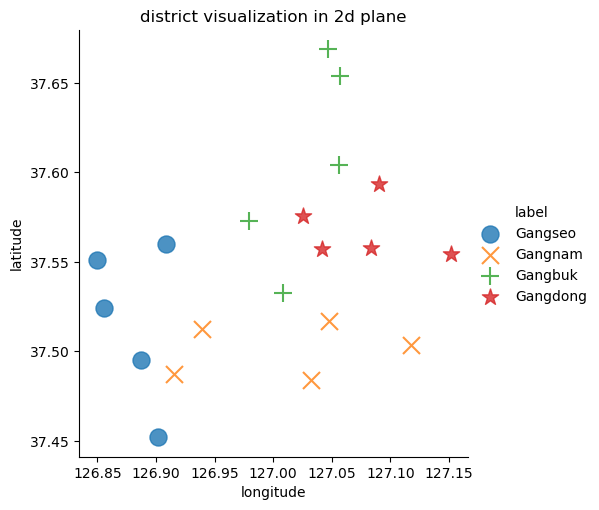

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# 경도, 위도에 따른 데이터 시각화
sns.lmplot(data=train_df, x='longitude', y='latitude', fit_reg=False ,scatter_kws={'s':150}, markers=['o','x','+','*'], hue='label')

# title
plt.title('district visualization in 2d plane')

### 데이터 다듬기
- 학습 및 테스트에 필요 없는 특징(feature)을 데이터에서 제거.
- 구 이름 및 동 이름은 학습 및 테스트에 필요 없으므로 제거.

In [ ]:
train_df.drop()